# Пракктическая работа 7

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
model = DecisionTreeClassifier()
from sklearn import tree


загружаем датасет

In [4]:
df = pd.read_csv("vgsales_12.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,15197,Let's Play Flight Attendant,DS,2010.0,Simulation,Deep Silver,0.02,0.00,0.0,0.00,0.02
1,5292,Mini Ninjas,DS,2009.0,Action,Eidos Interactive,0.17,0.15,0.0,0.04,0.35
2,3119,SingStar Pop Hits,PS2,2007.0,Misc,Sony Computer Entertainment,0.00,0.50,0.0,0.15,0.65
3,13923,Super Army War,GBA,2005.0,Action,Flashpoint Games,0.03,0.01,0.0,0.00,0.04
4,7564,Rocket Power: Zero Gravity Zone,GBA,2003.0,Sports,THQ,0.14,0.05,0.0,0.00,0.20
...,...,...,...,...,...,...,...,...,...,...,...
548,6409,Ultimate NES Remix,3DS,2014.0,Action,Unknown,0.15,0.09,0.0,0.02,0.27
549,11069,Jambo! Safari Animal Rescue,Wii,2009.0,Simulation,Sega,0.07,0.01,0.0,0.01,0.09
550,2311,Tiger Woods PGA Tour 12: The Masters,PS3,2011.0,Sports,Electronic Arts,0.52,0.26,0.0,0.12,0.90
551,8992,Elf: The Movie,GBA,2004.0,Action,Crave Entertainment,0.10,0.04,0.0,0.00,0.15


удаляем столбцы с нерелевантными данными

In [5]:
df.drop(['Platform', 'Name', 'Genre', 'Publisher'], axis=1, inplace=True)

удаляем строки с пропущенными значениями

In [6]:
df.dropna(inplace=True)

переводим категориальные признаки в числовые

In [7]:
df['Rank'] = pd.factorize(df['Rank'])[0]
df['NA_Sales'] = pd.factorize(df['NA_Sales'])[0]
df['EU_Sales'] = pd.factorize(df['EU_Sales'])[0]
df['JP_Sales'] = pd.factorize(df['JP_Sales'])[0]
df['Global_Sales'] = pd.factorize(df['Global_Sales'])[0]

разбиваем датасет на признаки и целевую переменную

In [8]:
X = df.drop('Global_Sales', axis=1)
y = df['Global_Sales']

разбиваем данные на обучающую и тестовую выборки в соотношении 70% / 30%

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


создаем и обучаем модель

In [10]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

делаем предсказания на тестовой выборке

In [11]:
y_pred = model.predict(X_test)

вычисляем точность предсказаний

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.2926829268292683


вычисляем чувствительность предсказаний

In [13]:
recall = recall_score(y_test, y_pred, average='weighted')
print(recall)

0.2926829268292683


c:\Users\whisp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


вычисляем аккуратность предсказаний

In [14]:
precision = precision_score(y_test, y_pred, average='weighted')
print(precision)

0.29290069686411146


c:\Users\whisp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


вычисляем финальные предсказания

In [15]:
f1score = f1_score(y_test, y_pred, average='weighted')
print(f1score)

0.27910898682060803


Рисуем дерево

[Text(0.3694398192197907, 0.9772727272727273, 'x[5] <= 0.005\ngini = 0.975\nsamples = 381\nvalue = [24, 2, 1, 11, 4, 10, 25, 1, 1, 3, 1, 2, 4, 1\n5, 4, 6, 5, 17, 12, 21, 1, 3, 3, 8, 18, 5, 5\n1, 1, 1, 5, 2, 1, 1, 2, 1, 11, 1, 2, 2, 3\n2, 1, 1, 1, 2, 2, 1, 7, 1, 1, 11, 9, 1, 1\n1, 3, 3, 1, 1, 5, 1, 1, 3, 1, 1, 1, 2, 8\n2, 1, 1, 1, 1, 4, 4, 2, 1, 4, 1, 2, 2, 2\n1, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(0.22142602283539486, 0.9318181818181818, 'x[4] <= 7.5\ngini = 0.922\nsamples = 167\nvalue = [24, 1, 0, 10, 1, 3, 20, 0, 0, 0, 0, 1, 2, 1\n1, 1, 3, 0, 12, 6, 21, 0, 0, 2, 4, 18, 3, 2\n0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1\n0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 4, 5, 0, 0\n0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4\n0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.1778663177925785, 0.8863636363636364, 'x[4] <= 6.5\

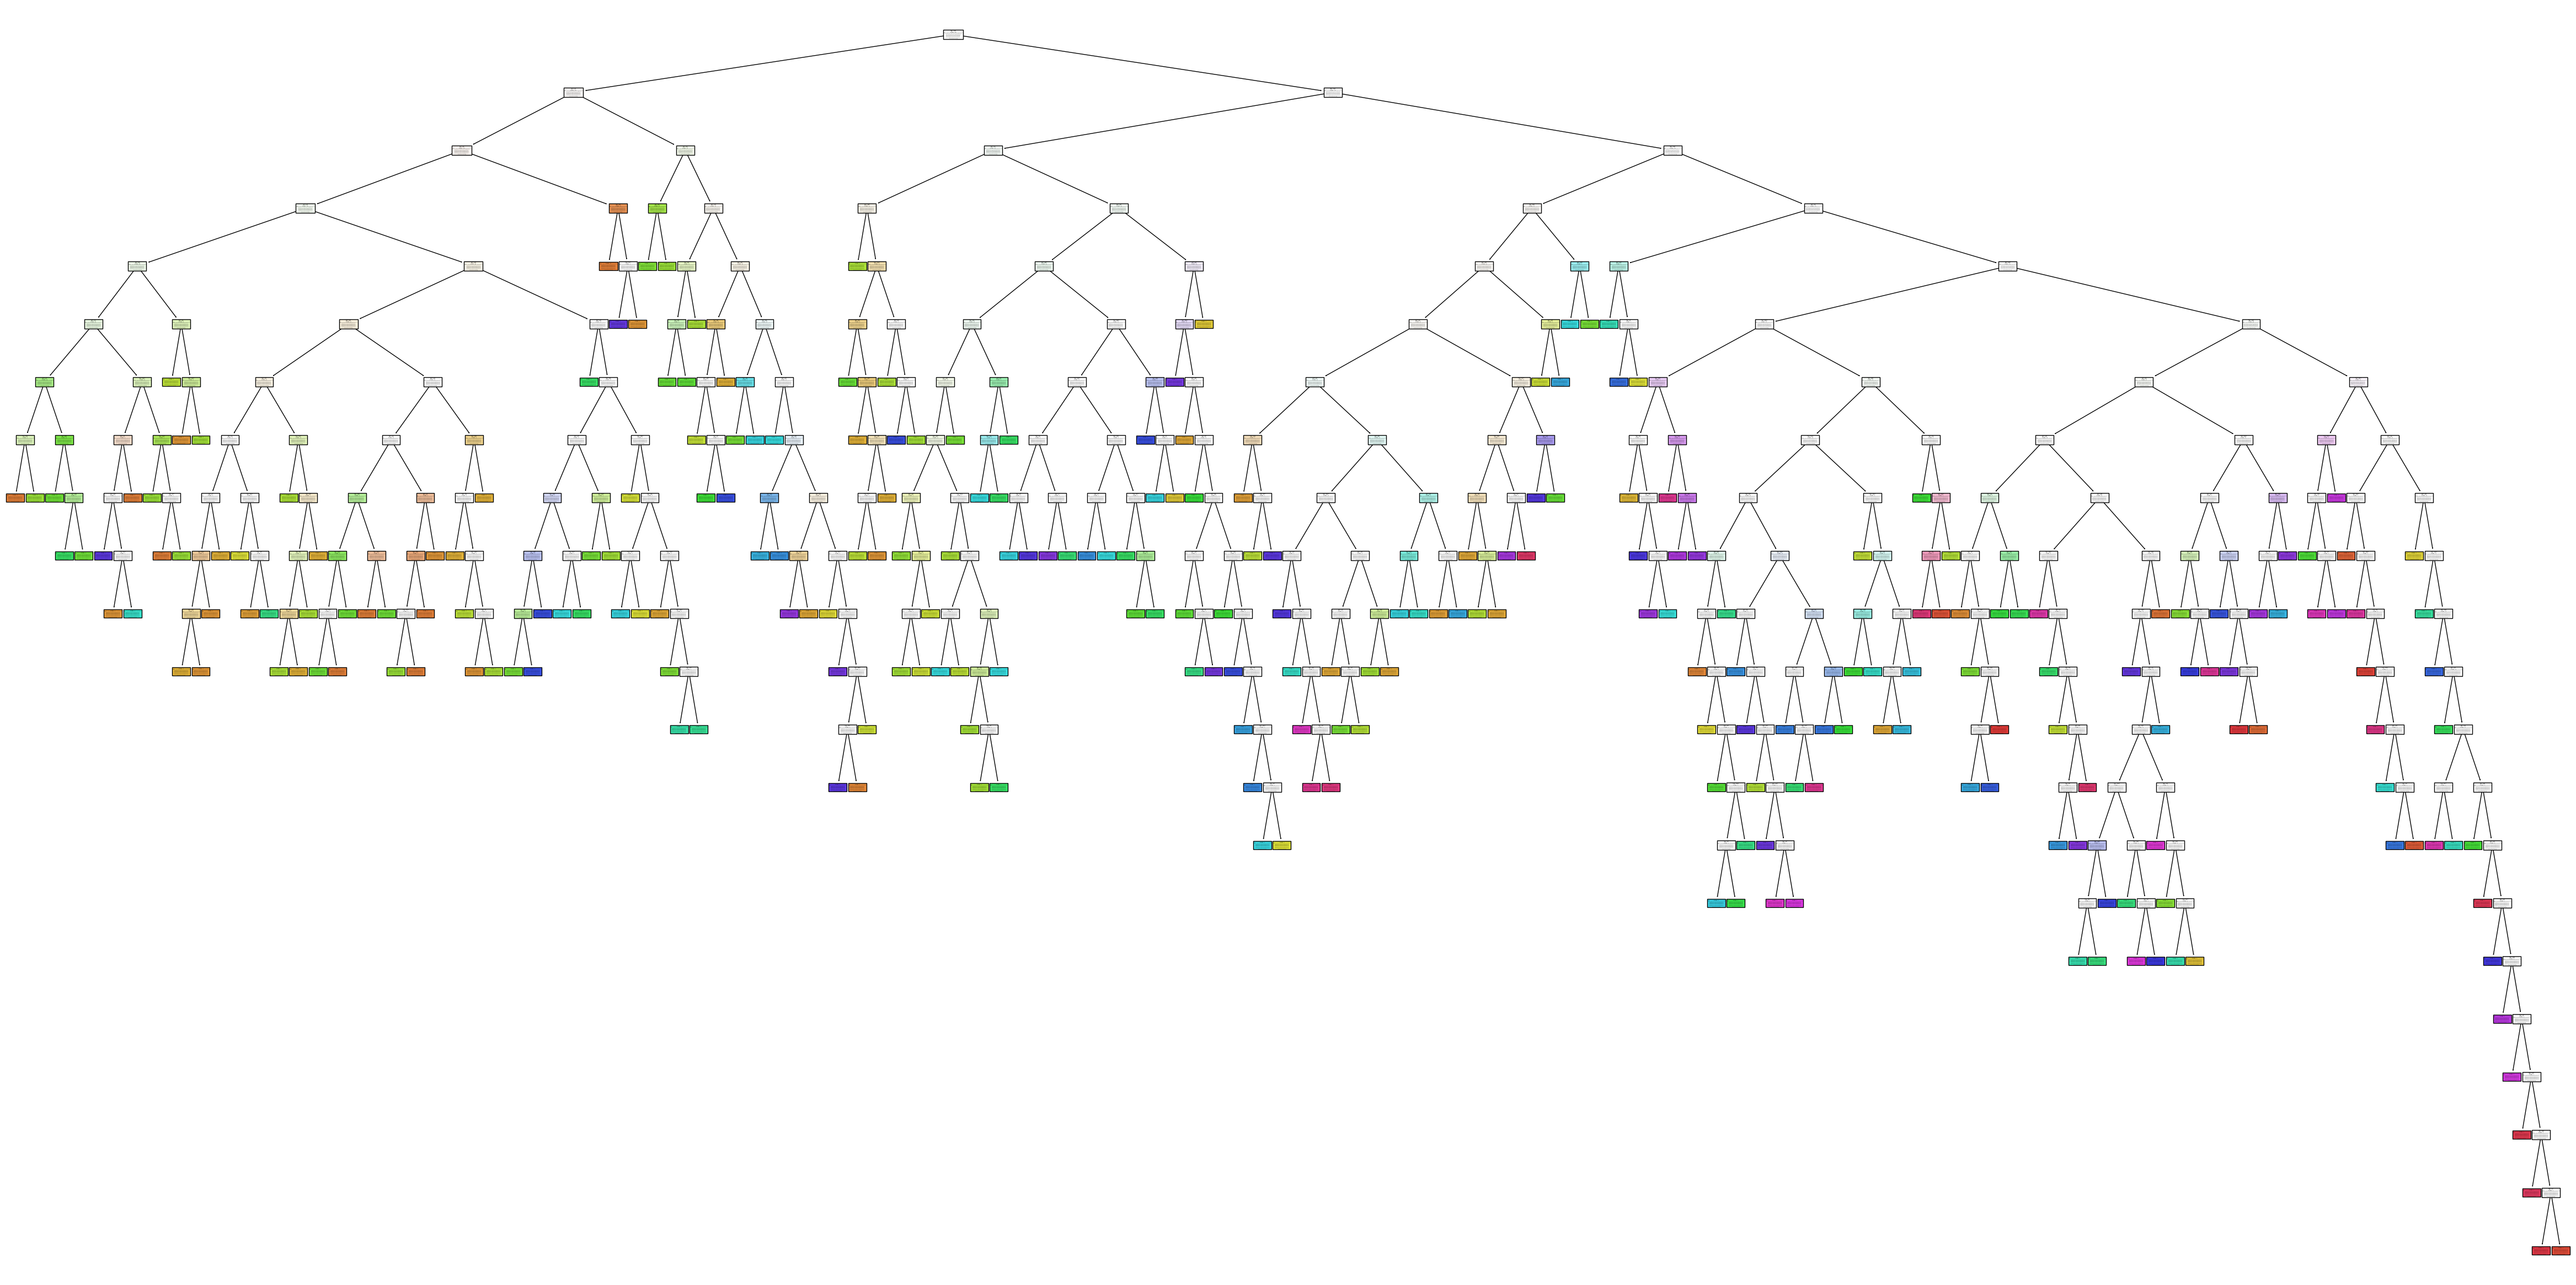

In [16]:
plt.figure(figsize=(60,30))
tree.plot_tree(model, filled=True)

Обучение дерева с гиперпараметрами

In [17]:
model_plot = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, max_leaf_nodes=200)
model_plot = model_plot.fit(X_train.iloc[::20], y_train.iloc[::20])

Рисуем дерево

[Text(0.42105263157894735, 0.9166666666666666, 'x[5] <= 0.005\ngini = 0.94\nsamples = 20\nvalue = [1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1\n1, 1, 1, 1]'),
 Text(0.21052631578947367, 0.75, 'x[0] <= 344.5\ngini = 0.72\nsamples = 5\nvalue = [1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0\n0, 1, 0, 0]'),
 Text(0.10526315789473684, 0.5833333333333334, 'x[1] <= 2010.0\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(0.05263157894736842, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(0.15789473684210525, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(0.3157894736842105, 0.5833333333333334, 'x[4] <= 4.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0\n0, 1, 0, 0]'),
 Text(0.2631578947368421, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

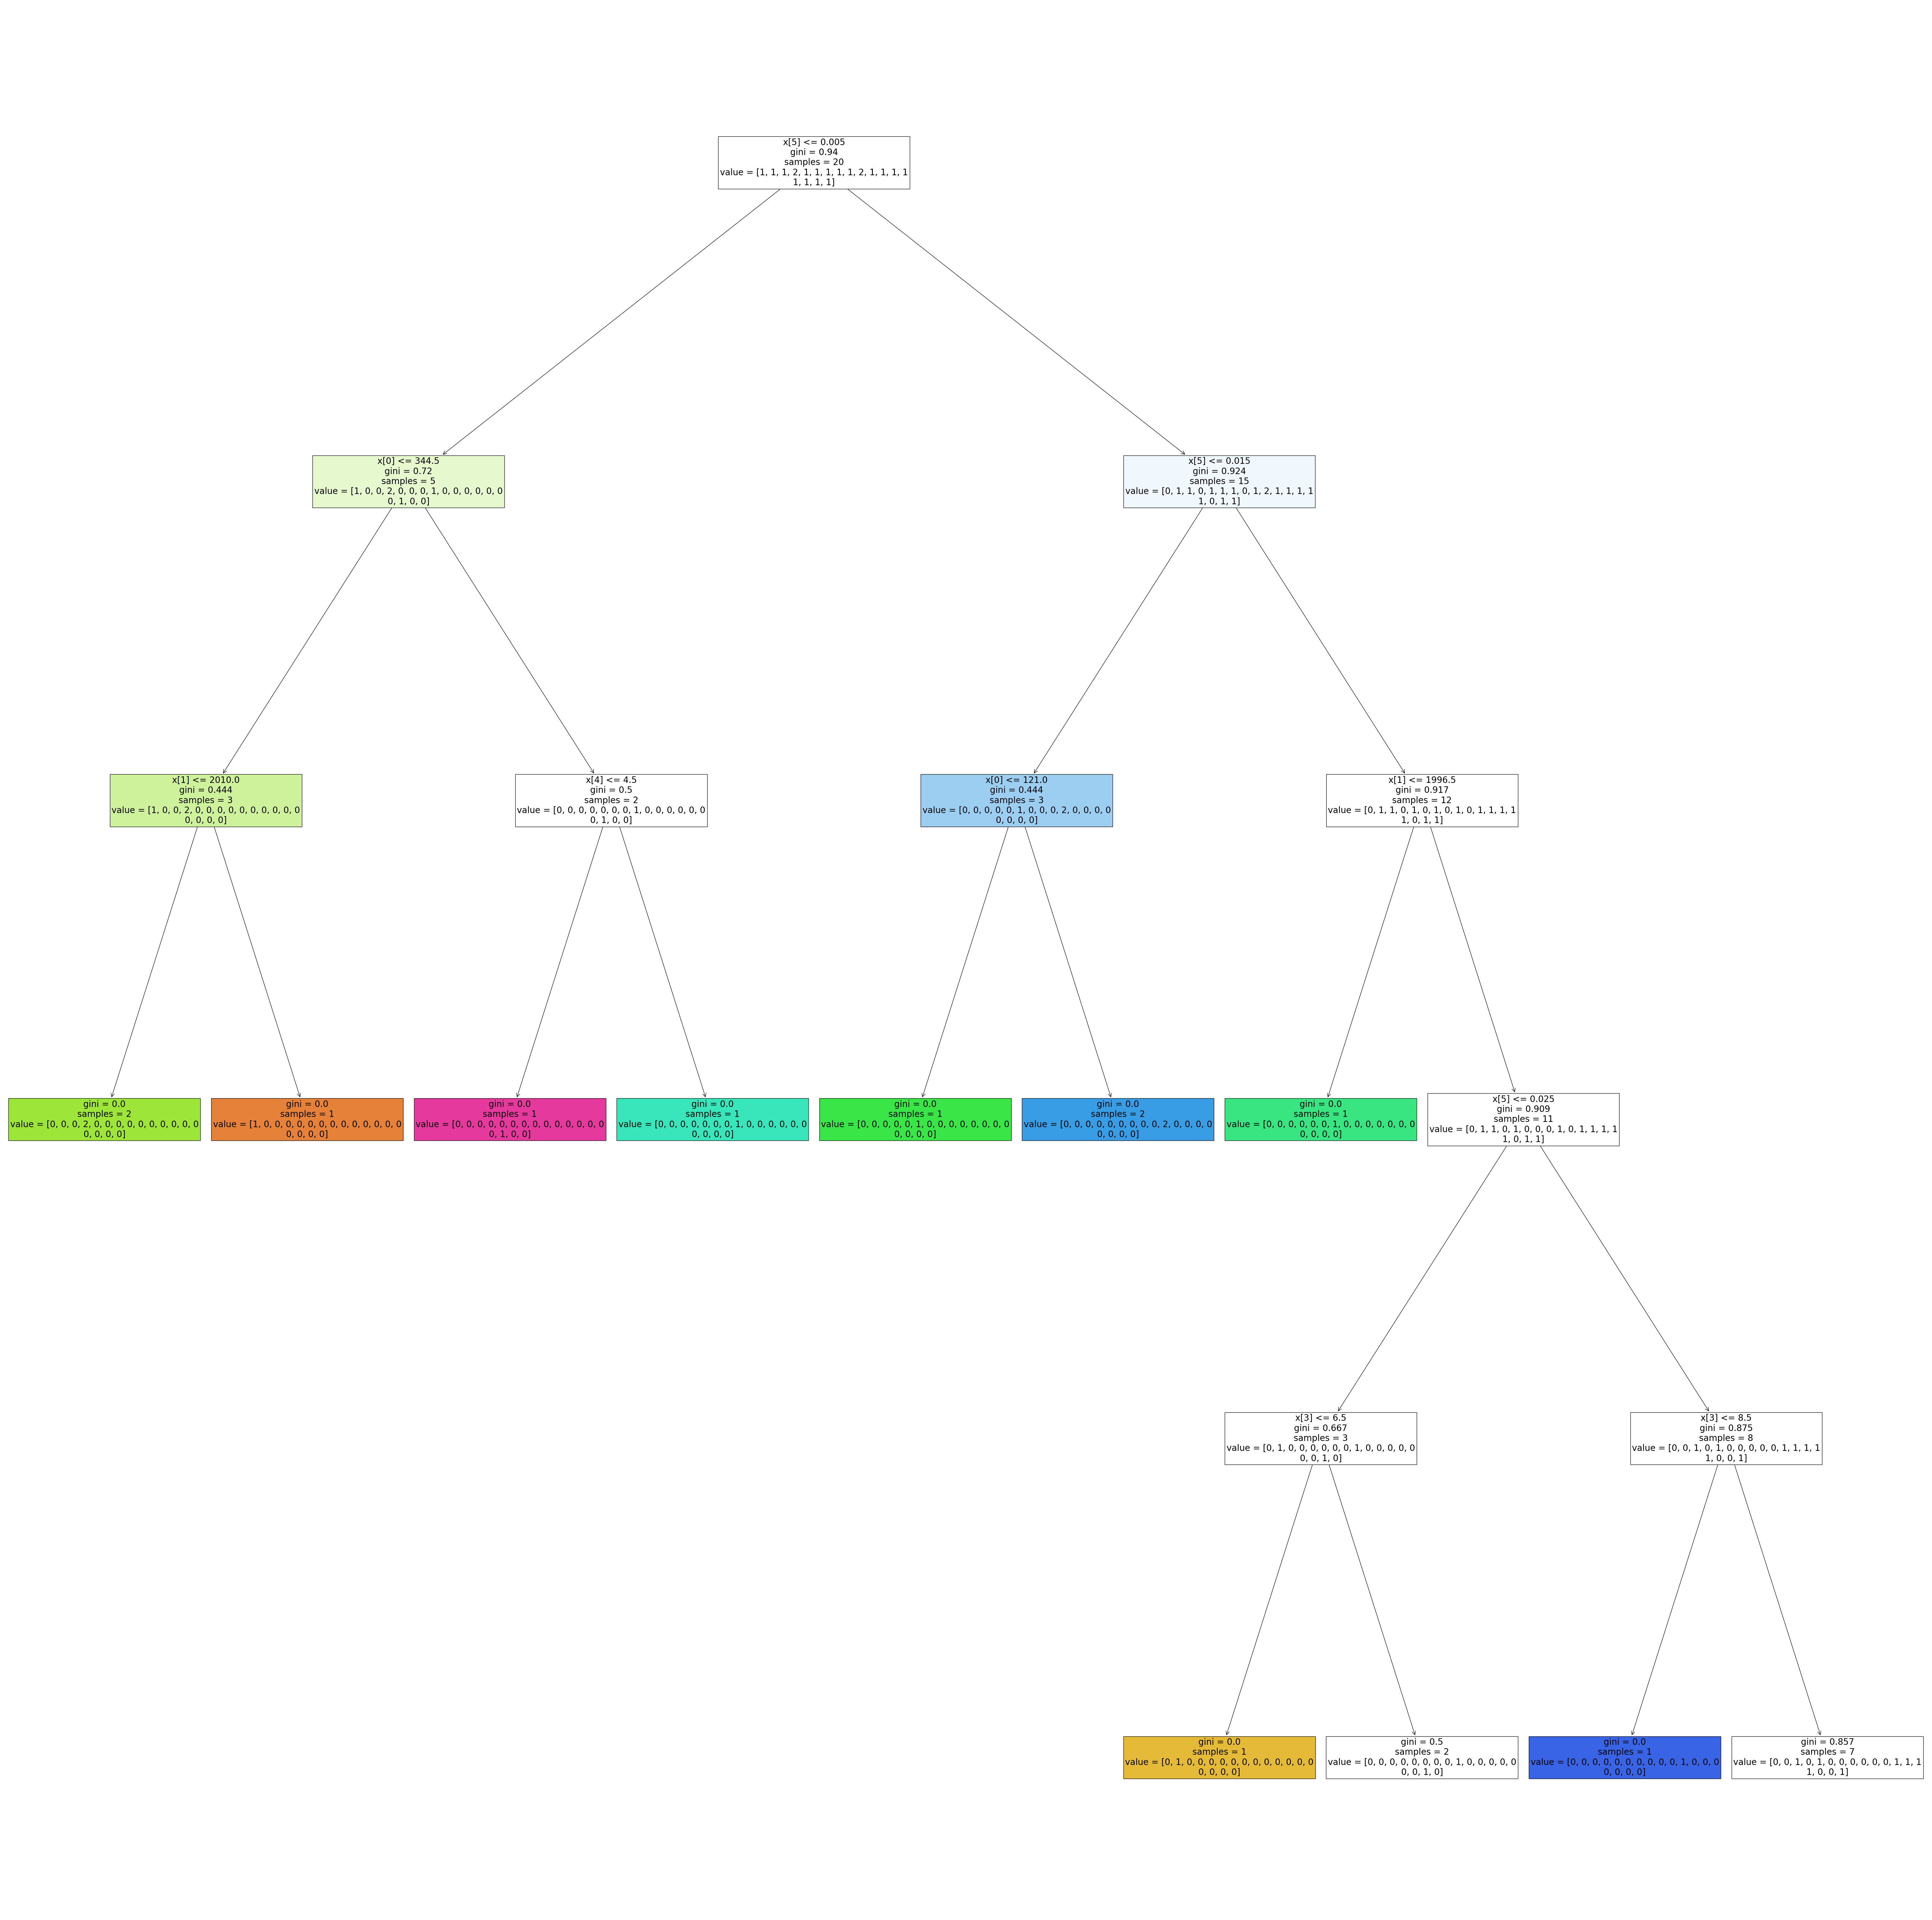

In [18]:
plt.figure(figsize=(80,80))
tree.plot_tree(model_plot, filled=True, fontsize=20)

делаем предсказания

In [19]:
y_pred = model_plot.predict(X_test)

вычисляем точность предсказаний

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.07926829268292683


вычисляем чувствительность предсказаний

In [21]:
recall = recall_score(y_test, y_pred, average='weighted')
print(recall)

0.07926829268292683


c:\Users\whisp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


вычисляем аккуратность предсказаний

In [22]:
precision = precision_score(y_test, y_pred, average='weighted')
print(precision)

0.07024293457220286


c:\Users\whisp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


вычисляем финальный предсказания

In [23]:
f1score = f1_score(y_test, y_pred, average='weighted')
print(f1score)

0.06481677860256864
